
## Doubling the cell of a dump from lammps


In [23]:
from ase.io import read,write
import ase
import nglview as nv



a = read ('dump.xyz',":")

from ase import io

for atoms in a:
    atoms.set_cell([[20.850061,0,0],[0,24.075534,0],[0,0,36.107136]]) # change the cell accordingly
    
with open('dump_2_2.xyz', 'w') as f:
    for atoms in a:
        atoms.set_cell([[20.850061,0,0],[0,24.075534,0],[0,0,36.107136]])
        io.write(f, atoms*(2,2,1), format='extxyz')

    



NGLWidget(max_frame=103)

In [15]:
def view_structure(structure,myvec=[]):
    """
    Use the ASE library to view an atoms object.

    Parameters
    ----------

    structure: Atoms object

    Returns
    -------

    NGLWidget with GUI: object to be viewed
    
    """
    t = nv.ASEStructure(structure)
    w = nv.NGLWidget(t, gui=True)
    w.add_unitcell()
    w.add_ball_and_stick()
    w.add_representation('label',label_type='atomindex',color='black')
    w.add_representation('spacefill',selection=myvec,color="blue",radius=0.5)
    return w

def view_trajectory(trajectory,myvec=[]):
    t2 = nv.ASETrajectory(trajectory)
    w2 = nv.NGLWidget(t2, gui=True)
    #w2.add_unitcell()
    w2.add_ball_and_stick()
    w2.add_representation('spacefill',selection=myvec,color="blue",radius=0.8)
    return w2

In [ ]:
#mya = read ("dump_2_2.xyz",":")

#view_trajectory(mya)

In [ ]:

## Visualizing the BIAS of an OPES with pandas 

In [2]:
!pip install pandas # comment when done once

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 75.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


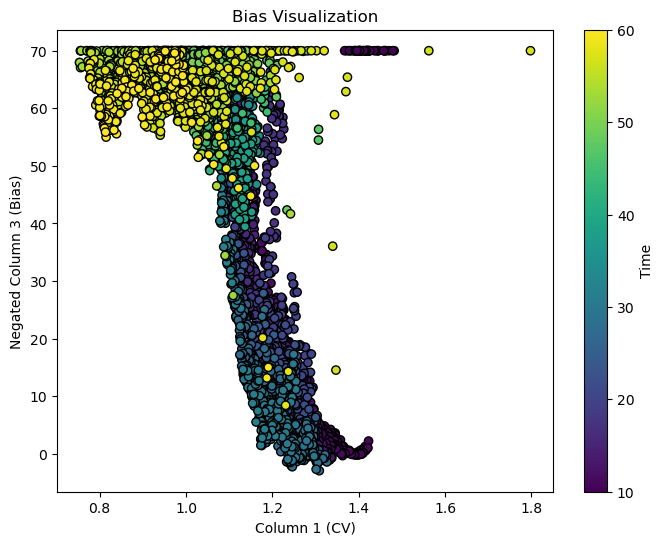

In [6]:
#
# Plotting the BIAS in time
#


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load COLVAR file (ignoring comment lines)
df = pd.read_csv("COLVAR", sep='\\s+', comment='#', header=None)

# Extract relevant columns
x_values = df.iloc[:, 2]   # Fourth column
y_values = -df.iloc[:, 3]  # Fifth column (changing sign)
time_values = df.iloc[:, 0]  # First column for coloring

# Create scatter plot with color coding by time
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_values, y_values, c=time_values, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label="Time")
plt.xlabel("Column 1 (CV)")
plt.ylabel("Negated Column 3 (Bias)")
plt.title("Bias Visualization")

plt.show()
